In [37]:
# Load Packages
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
from time import sleep
from scipy.stats import norm
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from tqdm import tqdm
from pandas.plotting import autocorrelation_plot
%matplotlib inline

In [147]:
#Importing Google Trends Data
trend = pd.read_csv('apple_trend.csv')
trend.head()

,date,Apple
0,10/1/2016 0:00,94
1,10/1/2016 1:00,93
2,10/1/2016 2:00,90
3,10/1/2016 3:00,85
4,10/1/2016 4:00,78


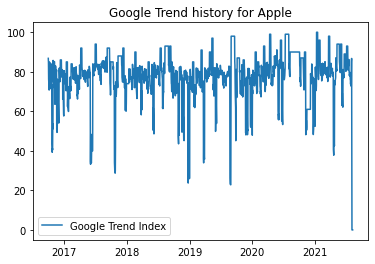

In [148]:
#Cleaning up the trend data so it is by day
def process_df(df):
    df.index = pd.to_datetime(df['date'])
    df2 = df.resample('D').mean().pad()
    #df2 = df2.drop(['isPartial'], axis = 1)
    return df2

apple_trend = process_df(trend)

plt.plot(apple_trend, label='Google Trend Index')
plt.legend()
plt.title("Google Trend history for Apple")
plt.show()

In [159]:

apple_trend['Date'] = list(map(lambda x: str(x.date()), list(apple_trend.index)))
apple_trend.head()

,Apple,Date
date,,
2016-10-01,86.791667,2016-10-01
2016-10-02,84.833333,2016-10-02
2016-10-03,76.250000,2016-10-03
2016-10-04,74.458333,2016-10-04
2016-10-05,72.750000,2016-10-05


In [149]:
sentiment = pd.read_csv('Apple_sentiment.csv')
sentiment.head()

,Unnamed: 0,Date,Text,neg,neu,pos,compound,probability,sentiment
0,0,2021-11-10,Apple announced Wednesday it's launching a bus...,0.000,1.000,0.000,0.0000,0.621849,POSITIVE
1,1,2021-11-10,Apple will be forced to allow app developers t...,0.161,0.803,0.036,-0.7579,0.999783,NEGATIVE
2,2,2021-11-10,German chipmaker and Apple-supplier Infineon i...,0.070,0.930,0.000,-0.2846,0.999716,NEGATIVE
3,3,2021-11-10,Tim Cook's company may have made your phone or...,0.129,0.871,0.000,-0.8047,0.998617,NEGATIVE
4,4,2021-11-10,Here are the biggest calls on Wall Street on W...,0.000,0.918,0.082,0.6369,0.999696,NEGATIVE


In [160]:
combined = sentiment.merge(apple_trend, how = 'left', on = 'Date')

In [161]:
combined.head()

,Unnamed: 0,Date,Text,neg,neu,pos,compound,probability,sentiment,Apple
0,0,2021-11-10,Apple announced Wednesday it's launching a bus...,0.000,1.000,0.000,0.0000,0.621849,POSITIVE,NaN
1,1,2021-11-10,Apple will be forced to allow app developers t...,0.161,0.803,0.036,-0.7579,0.999783,NEGATIVE,NaN
2,2,2021-11-10,German chipmaker and Apple-supplier Infineon i...,0.070,0.930,0.000,-0.2846,0.999716,NEGATIVE,NaN
3,3,2021-11-10,Tim Cook's company may have made your phone or...,0.129,0.871,0.000,-0.8047,0.998617,NEGATIVE,NaN
4,4,2021-11-10,Here are the biggest calls on Wall Street on W...,0.000,0.918,0.082,0.6369,0.999696,NEGATIVE,NaN


In [162]:
combined.to_csv('apple_combined.csv')